c:\Users\tqdcr\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


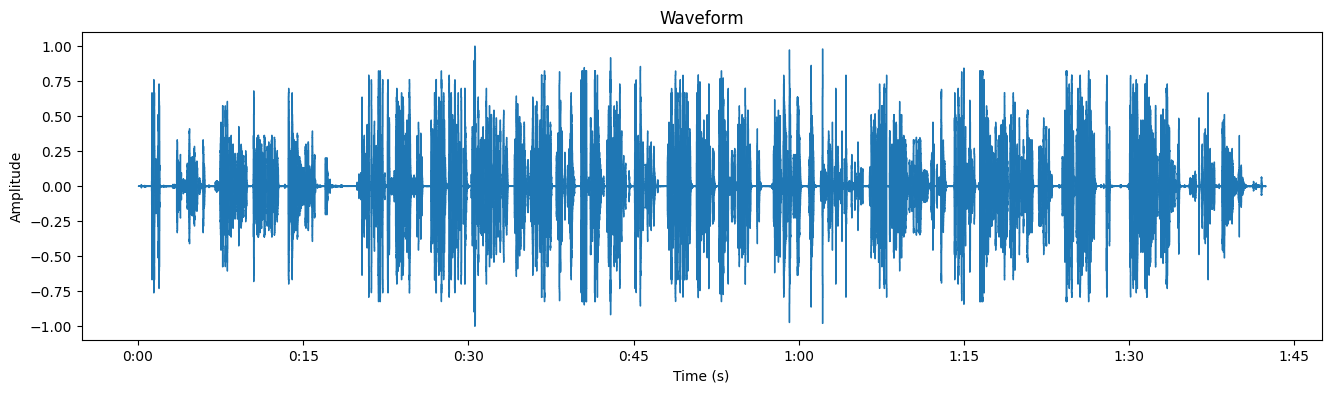

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load file âm thanh
y, sr = librosa.load('out-90839053905-6918-20240724-154737-1721810857.3210042.wav', sr=None)

# Hiển thị dạng sóng
plt.figure(figsize=(16, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()


In [ ]:
# Tính toán Mel-spectrogram
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

# Chuyển đổi Mel-spectrogram sang dB
S_dB = librosa.power_to_db(S, ref=np.max)

# Trực quan hóa Mel-spectrogram
plt.figure(figsize=(12, 4))
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Spectrogram')
plt.show()


TypeError: melspectrogram() takes 0 positional arguments but 1 positional argument (and 1 keyword-only argument) were given

In [ ]:
# Tính toán MFCC
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# Trực quan hóa MFCC
plt.figure(figsize=(12, 4))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.show()


In [ ]:
# Tính toán Chromagram
chroma = librosa.feature.chroma_stft(y=y, sr=sr)

# Trực quan hóa Chromagram
plt.figure(figsize=(12, 4))
librosa.display.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma')
plt.colorbar()
plt.title('Chromagram')
plt.show()


In [ ]:
# Kết hợp nhiều đặc trưng
combined_features = np.vstack([
    mfccs,
    chroma,
    spectral_contrast
])

# Trực quan hóa kết hợp
plt.figure(figsize=(12, 6))
librosa.display.specshow(combined_features, sr=sr, x_axis='time')
plt.colorbar()
plt.title('Combined Audio Features')
plt.show()


In [ ]:
# Start by making sure the `assemblyai` package is installed.
# If not, you can install it by running the following command:
# pip install -U assemblyai
#
# Note: Some macOS users may need to use `pip3` instead of `pip`.

import assemblyai as aai

# Replace with your API key
aai.settings.api_key = "4a23b8ed6a214be3b7c67cbd6c79db10"

# URL of the file to transcribe
FILE_URL = "rd/1.wav"

# You can also transcribe a local file by passing in a file path
# FILE_URL = './path/to/file.mp3'

transcriber = aai.Transcriber()
config = aai.TranscriptionConfig(language_code="vi",dual_channel=True)
transcript = transcriber.transcribe(FILE_URL,config=config)

sentences = transcript.get_sentences()
for sentence in sentences:
  print(sentence.text)

paragraphs = transcript.get_paragraphs()
for paragraph in paragraphs:
  print(paragraph.text)


Dạ, sau đó xin nghe.
Dạ, em chào Vina.
Em gọi từ nền mạng Vina phone đó chị.
Chị ơi, cái phim này của mình đang sử dụng là phone phim 3G đó chị.
Dạ.
Em xin gắn phone để đổi phim 4G dùm em nha.
Sắp tới là bên Vina sẽ hạ trạm xóng.
Phim mình sẽ không có xóng nữa chị nha.
Chị nói nó cứ bị đứt quảnh á em.
Sao chị?
Ủa, nghe nghe được chưa chị?
Nghe được chưa ạ?
Dạ, nghe được.
Dạ, tại cái phim của mình đang sử dụng là cái phone phim 3G cũ.
Thì sắp tới các nhà mọi người sẽ hạ trạm sóng bay và khô siêu không biểu dục được nữa.
Nên chị chăm sử chị ghé máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy máy má Tại vì người ta dụng cho quán nên là chỉ gọi với nhận cuộc gọi thôi chứ không có làm gì trên

In [ ]:
from transformers import Wav2Vec2Processor, Wav2Vec2ForCTC
import librosa
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

processor = Wav2Vec2Processor.from_pretrained("khanhld/wav2vec2-base-vietnamese-160h")
model = Wav2Vec2ForCTC.from_pretrained("khanhld/wav2vec2-base-vietnamese-160h")
model.to(device)

def transcribe(wav):
  input_values = processor(wav, sampling_rate=16000, return_tensors="pt").input_values
  logits = model(input_values.to(device)).logits
  pred_ids = torch.argmax(logits, dim=-1)
  pred_transcript = processor.batch_decode(pred_ids)[0]
  return pred_transcript


wav, _ = librosa.load('rd/1.wav', sr = 16000)
print(f"transcript: {transcribe(wav)}")


c:\Users\tqdcr\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\tqdcr\AppData\Local\Programs\Python\Python39\lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\tqdcr\.cache\huggingface\hub\models--khanhld--wav2vec2-base-vietnamese-160h. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run P

transcript: d tô rót tin hd m em gọi ti n mạn đ nó  ất tiên này cũn mình đan tử dụng là  i ba gtị dạn  m t ôn tì đổi  búng tìm em tới là bên đina  hạ cậm th mình  nói nó có bị tức qản em ta  nge nghe được chưa chyện  chưa  a d dà được àdà tại tiêm của mình  ban cử dụng là cái thô thi b ũ tì stá nằm n t tả hà trạm tống bà mậ ô xê không bể dục đường nữa c em n ủ chị gm na thì đổi nim bún rờ gìn em  th mả ìmình nữ vệc  em eôn hố dỡn cái việm  vịc dần gất  t dà qần ha chôn am phú quận hai ậ mình v  cửa hàng mộ  vậ từn nảo h nó là mà trong hảm mùn ăm mộ   của nhưng mà thị em hi tiếu i mề đứng tên anh lm đúng hn gnc này tì công cho quán  lài gội á nận c gọ  hôn có lạncn cái biện hại  n cái này đi đổi thi màan em te máy đổ như cị  chứ hổng có  d à dạ là óđ te hảy    mà chắm mả ti hớm nì em thứ lan hạ trạm từ từ ó tỏ lúc đó mình không mà có kống tìn không gọi đợc l á d dạ nhưg mà tmình hỏi cátì hại m   là điệm hai gờ luôn đúng dạ đúng  vệ thì mình phải đổi   viện hoại ba gờ luôn  tại á điện họ

In [ ]:
from transformers import Wav2Vec2Processor, Wav2Vec2ForCTC
import librosa
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

processor = Wav2Vec2Processor.from_pretrained("nguyenvulebinh/wav2vec2-base-vietnamese-250h")
model = Wav2Vec2ForCTC.from_pretrained("nguyenvulebinh/wav2vec2-base-vietnamese-250h")
model.to(device)

def transcribe(wav):
  input_values = processor(wav, sampling_rate=16000, return_tensors="pt").input_values
  logits = model(input_values.to(device)).logits
  pred_ids = torch.argmax(logits, dim=-1)
  pred_transcript = processor.batch_decode(pred_ids)[0]
  return pred_transcript



c:\Users\tqdcr\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\tqdcr\AppData\Local\Programs\Python\Python39\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
c:\Users\tqdcr\AppData\Local\Programs\Python\Python39\lib\site-packages\transformers\configuration_utils.py:364: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if 

In [ ]:
import os

In [ ]:
folder_path = 'rd'
# Check if the folder exists
if os.path.exists(folder_path):
    # Loop through each file in the folder
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)

        # Only process files, not subdirectories
        if os.path.isfile(file_path):
            wav, _ = librosa.load(f'rd/{file_name}', sr = 16000)
            print(f"transcript: {transcribe(wav)}")



transcript: dạ sao đó xin nghe  dạ em choem gọi tr tên mãng vin nó ú á chị á tim này củ mình đang sử dụng là hô xim bao g  chị dạ  ám to  thì đổi xim đúng gờ giùm em nhá tới là bên vi na th sẽ hạ chạm ntim mình cchị nói nó cứ bị đức quản á em  sao chị ủa nghe nghe được chưa chị nghe chứa ạ à diờ dạ được à dạ tại cái tim của mình đ đang sử dụng là cái phô tim bal củ ì phái ở tó nhằm  so sẽ  trạ thống bao gọ thô xim không bử dụng được nữa ochị em chủ chị vám in a chị đổi đên xim bốn gờ giùm em nha  tháng bảy nà b gùm em mình ở thuật nà đạ em emem em hướng dẫn cái điểm giao dịch gần nhất chư chị dạ ở quận hai ạ phưần an phú quận hai vậy mình g cái cửa hàng một cố bảy trần não nha đó làm ở trong hảm mộn năm một dạ ủa nhưng mà chị cho em hỏi xíu cái xim này đứng tên năm lăm đúng khôn gống r tại cái này thì ton cho quán á nên là  chị gọivới nhận cộc gọi  cứ không có lạm cái gì trên cái điện thoại đãhếtvậ cái này đi đổi xim mà am lm  em theo máy đổi g chị cứ chứ khổng cót ùm ậ n à dạ là  ở th

c:\Users\tqdcr\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


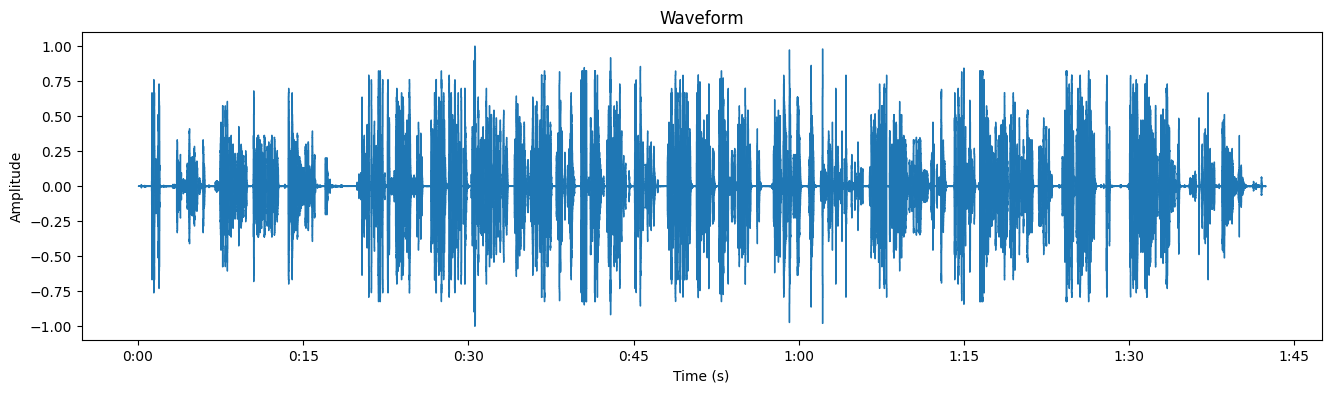

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load file âm thanh
y, sr = librosa.load('rd/1.wav', sr=None)

# Hiển thị dạng sóng
plt.figure(figsize=(16, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()


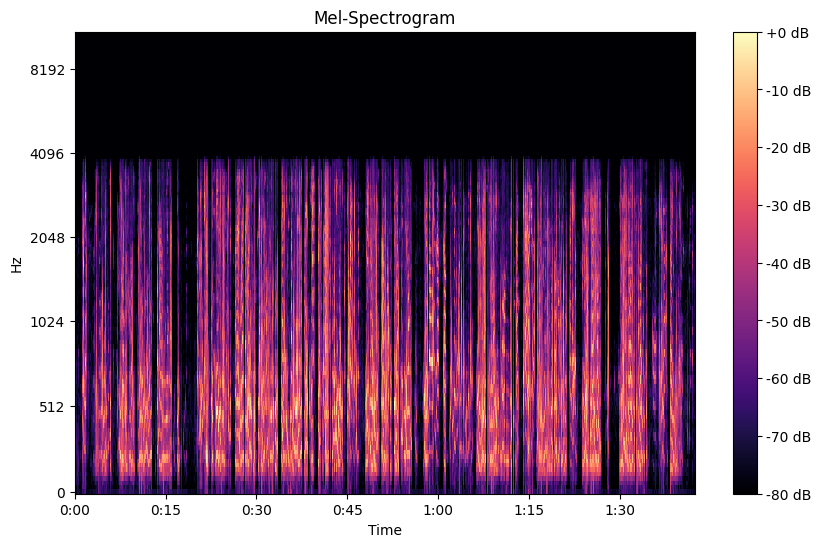

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

y, sr = librosa.load("rd/1.wav")
# STFT Spectrogram
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(abs(D), ref=np.max)

# Mel-Spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
S_db = librosa.power_to_db(S, ref=np.max)

# Plot
plt.figure(figsize=(10, 6))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title("Mel-Spectrogram")
plt.show()


In [ ]:
# pip install transformers torch accelerate
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

# Khởi tạo tokenizer và model từ checkpoint đã lưu
tokenizer = AutoTokenizer.from_pretrained("himmeow/vi-gemma-2b-RAG")
model = AutoModelForCausalLM.from_pretrained(
    "himmeow/vi-gemma-2b-RAG",
    device_map="auto",
    torch_dtype=torch.bfloat16
)

# Sử dụng GPU nếu có
if torch.cuda.is_available():
    model.to("cuda")

# Định dạng prompt cho model
prompt = """
### Instruction and Input:
Dựa vào ngữ cảnh/tài liệu sau:
{}
Hãy trả lời câu hỏi: {}

### Response:
{}
"""

# Chuẩn bị dữ liệu đầu vào
input_data = """
Short Tandem Repeats (STRs) là các trình tự DNA lặp lại ngắn (2- 6 nucleotides) xuất hiện phổ biến trong hệ gen của con người. Các trình tự này có tính đa hình rất cao trong tự nhiên, điều này khiến các STRs trở thành những markers di truyền rất quan trọng trong nghiên cứu bản đồ gen người và chuẩn đoán bệnh lý di truyền cũng như xác định danh tính trong lĩnh vực pháp y.
Các STRs trở nên phổ biến tại các phòng xét nghiệm pháp y bởi vì việc nhân bản và phân tích STRs chỉ cần lượng DNA rất thấp ngay cả khi ở dạng bị phân hủy việc đinh danh vẫn có thể được thực hiện thành công. Hơn nữa việc phát hiện và đánh giá sự nhiễm DNA mẫu trong các mẫu vật có thể được giải quyết nhanh với kết quả phân tích STRs. Ở Hoa Kỳ hiện nay, từ bộ 13 markers nay đã tăng lên 20 markers chính đang được sử dụng để tạo ra một cơ sở dữ liệu DNA trên toàn đất nước được gọi là The FBI Combined DNA Index System (Expaned CODIS).
CODIS và các cơ sử dữ liệu DNA tương tự đang được sử dụng thực sự thành công trong việc liên kết các hồ sơ DNA từ các tội phạm và các bằng chứng hiện trường vụ án. Kết quả định danh STRs cũng được sử dụng để hỗ trợ hàng trăm nghìn trường hợp xét nghiệm huyết thống cha con mỗi năm'
"""
query = "Hãy cho tôi biết một số tính chất của STRs được dùng để làm gì?"

# Định dạng input text
input_text = prompt.format(input_data, query," ")

# Mã hóa input text thành input ids
input_ids = tokenizer(input_text, return_tensors="pt")

# Sử dụng GPU cho input ids nếu có
if torch.cuda.is_available():
    input_ids = input_ids.to("cuda")

# Tạo văn bản bằng model
outputs = model.generate(
    **input_ids,
    max_new_tokens=500,
    no_repeat_ngram_size=5,  # Ngăn chặn lặp lại các cụm từ 5 gram
    # do_sample=True,   # Kích hoạt chế độ tạo văn bản dựa trên lấy mẫu. Trong chế độ này, model sẽ chọn ngẫu nhiên token tiếp theo dựa trên xác suất được tính từ phân phối xác suất của các token.
    # temperature=0.7,  # Giảm temperature để kiểm soát tính ngẫu nhiên
    # early_stopping=True,  # Dừng tạo văn bản khi tìm thấy kết thúc phù hợp
)
# Giải mã và in kết quả
print(tokenizer.decode(outputs[0]))

'''
<bos>
### Instruction and Input:
Dựa vào ngữ cảnh/tài liệu sau:

Short Tandem Repeats (STRs) là các trình tự DNA lặp lại ngắn (2- 6 nucleotides) xuất hiện phổ biến trong hệ gen của con người. Các trình tự này có tính đa hình rất cao trong tự nhiên, điều này khiến các STRs trở thành những markers di truyền rất quan trọng trong nghiên cứu bản đồ gen người và chuẩn đoán bệnh lý di truyền cũng như xác định danh tính trong lĩnh vực pháp y.
Các STRs trở nên phổ biến tại các phòng xét nghiệm pháp y bởi vì việc nhân bản và phân tích STRs chỉ cần lượng DNA rất thấp ngay cả khi ở dạng bị phân hủy việc đinh danh vẫn có thể được thực hiện thành công. Hơn nữa việc phát hiện và đánh giá sự nhiễm DNA mẫu trong các mẫu vật có thể được giải quyết nhanh với kết quả phân tích STRs. Ở Hoa Kỳ hiện nay, từ bộ 13 markers nay đã tăng lên 20 markers chính đang được sử dụng để tạo ra một cơ sở dữ liệu DNA trên toàn đất nước được gọi là The FBI Combined DNA Index System (Expaned CODIS).
CODIS và các cơ sử dữ liệu DNA tương tự đang được sử dụng thực sự thành công trong việc liên kết các hồ sơ DNA từ các tội phạm và các bằng chứng hiện trường vụ án. Kết quả định danh STRs cũng được sử dụng để hỗ trợ hàng trăm nghìn trường hợp xét nghiệm huyết thống cha con mỗi năm'

Hãy trả lời câu hỏi: Hãy cho tôi biết một số tính chất của STRs được dùng để làm gì?

### Response:

STRs được sử dụng để xác định danh tính, chuẩn đoán bệnh lý và xác định bệnh lý di truyền.
<eos>
'''


c:\Users\tqdcr\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\tqdcr\AppData\Local\Programs\Python\Python39\lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\tqdcr\.cache\huggingface\hub\models--himmeow--vi-gemma-2b-RAG. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an ad

<bos>
### Instruction and Input:
Dựa vào ngữ cảnh/tài liệu sau:

Short Tandem Repeats (STRs) là các trình tự DNA lặp lại ngắn (2- 6 nucleotides) xuất hiện phổ biến trong hệ gen của con người. Các trình tự này có tính đa hình rất cao trong tự nhiên, điều này khiến các STRs trở thành những markers di truyền rất quan trọng trong nghiên cứu bản đồ gen người và chuẩn đoán bệnh lý di truyền cũng như xác định danh tính trong lĩnh vực pháp y.
Các STRs trở nên phổ biến tại các phòng xét nghiệm pháp y bởi vì việc nhân bản và phân tích STRs chỉ cần lượng DNA rất thấp ngay cả khi ở dạng bị phân hủy việc đinh danh vẫn có thể được thực hiện thành công. Hơn nữa việc phát hiện và đánh giá sự nhiễm DNA mẫu trong các mẫu vật có thể được giải quyết nhanh với kết quả phân tích STRs. Ở Hoa Kỳ hiện nay, từ bộ 13 markers nay đã tăng lên 20 markers chính đang được sử dụng để tạo ra một cơ sở dữ liệu DNA trên toàn đất nước được gọi là The FBI Combined DNA Index System (Expaned CODIS).
CODIS và các cơ sử dữ liệ

"\n<bos>\n### Instruction and Input:\nDựa vào ngữ cảnh/tài liệu sau:\n\nShort Tandem Repeats (STRs) là các trình tự DNA lặp lại ngắn (2- 6 nucleotides) xuất hiện phổ biến trong hệ gen của con người. Các trình tự này có tính đa hình rất cao trong tự nhiên, điều này khiến các STRs trở thành những markers di truyền rất quan trọng trong nghiên cứu bản đồ gen người và chuẩn đoán bệnh lý di truyền cũng như xác định danh tính trong lĩnh vực pháp y.\nCác STRs trở nên phổ biến tại các phòng xét nghiệm pháp y bởi vì việc nhân bản và phân tích STRs chỉ cần lượng DNA rất thấp ngay cả khi ở dạng bị phân hủy việc đinh danh vẫn có thể được thực hiện thành công. Hơn nữa việc phát hiện và đánh giá sự nhiễm DNA mẫu trong các mẫu vật có thể được giải quyết nhanh với kết quả phân tích STRs. Ở Hoa Kỳ hiện nay, từ bộ 13 markers nay đã tăng lên 20 markers chính đang được sử dụng để tạo ra một cơ sở dữ liệu DNA trên toàn đất nước được gọi là The FBI Combined DNA Index System (Expaned CODIS).\nCODIS và các cơ 

In [ ]:
prompt = """
# ### Instruction and Input:
# Dựa vào ngữ cảnh/tài liệu sau:
# {}
# Hãy trả lời câu hỏi: {}

# ### Response:
# {}
# """

# # Chuẩn bị dữ liệu đầu vào
# input_data = """
# Short Tandem Repeats (STRs) là các trình tự DNA lặp lại ngắn (2- 6 nucleotides) xuất hiện phổ biến trong hệ gen của con người. Các trình tự này có tính đa hình rất cao trong tự nhiên, điều này khiến các STRs trở thành những markers di truyền rất quan trọng trong nghiên cứu bản đồ gen người và chuẩn đoán bệnh lý di truyền cũng như xác định danh tính trong lĩnh vực pháp y.
# Các STRs trở nên phổ biến tại các phòng xét nghiệm pháp y bởi vì việc nhân bản và phân tích STRs chỉ cần lượng DNA rất thấp ngay cả khi ở dạng bị phân hủy việc đinh danh vẫn có thể được thực hiện thành công. Hơn nữa việc phát hiện và đánh giá sự nhiễm DNA mẫu trong các mẫu vật có thể được giải quyết nhanh với kết quả phân tích STRs. Ở Hoa Kỳ hiện nay, từ bộ 13 markers nay đã tăng lên 20 markers chính đang được sử dụng để tạo ra một cơ sở dữ liệu DNA trên toàn đất nước được gọi là The FBI Combined DNA Index System (Expaned CODIS).
# CODIS và các cơ sử dữ liệu DNA tương tự đang được sử dụng thực sự thành công trong việc liên kết các hồ sơ DNA từ các tội phạm và các bằng chứng hiện trường vụ án. Kết quả định danh STRs cũng được sử dụng để hỗ trợ hàng trăm nghìn trường hợp xét nghiệm huyết thống cha con mỗi năm'
# """
# query = "Hãy cho tôi biết một số tính chất của STRs được dùng để làm gì?"

# # Định dạng input text
# input_text = prompt.format(input_data, query," ")
input_text = "đoạn trò chuyện này thể hiện gì:  dạ sao đó xin nghe  dạ em choem gọi tr tên mãng vin nó ú á chị á tim này củ mình đang sử dụng là hô xim bao g  chị dạ  ám to  thì đổi xim đúng gờ giùm em nhá tới là bên vi na th sẽ hạ chạm ntim mình cchị nói nó cứ bị đức quản á em  sao chị ủa nghe nghe được chưa chị nghe chứa ạ à diờ dạ được à dạ tại cái tim của mình đ đang sử dụng là cái phô tim bal củ ì phái ở tó nhằm  so sẽ  trạ thống bao gọ thô xim không bử dụng được nữa ochị em chủ chị vám in a chị đổi đên xim bốn gờ giùm em nha  tháng bảy nà b gùm em mình ở thuật nà đạ em emem em hướng dẫn cái điểm giao dịch gần nhất chư chị dạ ở quận hai ạ phưần an phú quận hai vậy mình g cái cửa hàng một cố bảy trần não nha đó làm ở trong hảm mộn năm một dạ ủa nhưng mà chị cho em hỏi xíu cái xim này đứng tên năm lăm đúng khôn gống r tại cái này thì ton cho quán á nên là  chị gọivới nhận cộc gọi  cứ không có lạm cái gì trên cái điện thoại đãhếtvậ cái này đi đổi xim mà am lm  em theo máy đổi g chị cứ chứ khổng cót ùm ậ n à dạ là  ở tháng bảy  l cắp là trong bảy li tốm giùm em chứ nó đang hạ chạm từ từ đó rợ lúc đó mình khôngcó sóng mình không gọi được luôn á à dạ dạ em cám ơn chị ừnhưng mà biết chmình hỏi cái điện thoại mình đang à là điện hai gờ luôn đúng kha dạ đúng rồi vậy thì mình phải đổi n cái điện thoại ba gờ luôn nha tại vì á điện thoại hai gờ nó nó cũng không in ác luôn á dạ dạ đạ e nói lại à dồ rồi vậ cám ơn chị nha ạ"
# Mã hóa input text thành input ids
input_ids = tokenizer(input_text, return_tensors="pt")

# Sử dụng GPU cho input ids nếu có
if torch.cuda.is_available():
    input_ids = input_ids.to("cuda")

# Tạo văn bản bằng model
outputs = model.generate(
    **input_ids,
    max_new_tokens=50000,
    no_repeat_ngram_size=5,  # Ngăn chặn lặp lại các cụm từ 5 gram
    # do_sample=True,   # Kích hoạt chế độ tạo văn bản dựa trên lấy mẫu. Trong chế độ này, model sẽ chọn ngẫu nhiên token tiếp theo dựa trên xác suất được tính từ phân phối xác suất của các token.
    # temperature=0.7,  # Giảm temperature để kiểm soát tính ngẫu nhiên
    # early_stopping=True,  # Dừng tạo văn bản khi tìm thấy kết thúc phù hợp
)
# Giải mã và in kết quả
print(tokenizer.decode(outputs[0]))




<bos>đoạn trò chuyện này thể hiện gì:  dạ sao đó xin nghe  dạ em choem gọi tr tên mãng vin nó ú á chị á tim này củ mình đang sử dụng là hô xim bao g  chị dạ  ám to  thì đổi xim đúng gờ giùm em nhá tới là bên vi na th sẽ hạ chạm ntim mình cchị nói nó cứ bị đức quản á em  sao chị ủa nghe nghe được chưa chị nghe chứa ạ à diờ dạ được à dạ tại cái tim của mình đ đang sử dụng là cái phô tim bal củ ì phái ở tó nhằm  so sẽ  trạ thống bao gọ thô xim không bử dụng được nữa ochị em chủ chị vám in a chị đổi đên xim bốn gờ giùm em nha  tháng bảy nà b gùm em mình ở thuật nà đạ em emem em hướng dẫn cái điểm giao dịch gần nhất chư chị dạ ở quận hai ạ phưần an phú quận hai vậy mình g cái cửa hàng một cố bảy trần não nha đó làm ở trong hảm mộn năm một dạ ủa nhưng mà chị cho em hỏi xíu cái xim này đứng tên năm lăm đúng khôn gống r tại cái này thì ton cho quán á nên là  chị gọivới nhận cộc gọi  cứ không có lạm cái gì trên cái điện thoại đãhếtvậ cái này đi đổi xim mà am lm  em theo máy đổi g chị cứ chứ khổ

In [ ]:
from transformers import Wav2Vec2Processor, Wav2Vec2ForCTC
import librosa
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

processor = Wav2Vec2Processor.from_pretrained("vinai/PhoWhisper-small")
model = Wav2Vec2ForCTC.from_pretrained("vinai/PhoWhisper-small")
model.to(device)

def transcribe(wav):
  input_values = processor(wav, sampling_rate=16000, return_tensors="pt").input_values
  logits = model(input_values.to(device)).logits
  pred_ids = torch.argmax(logits, dim=-1)
  pred_transcript = processor.batch_decode(pred_ids)[0]
  return pred_transcript



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/339 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/805 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/836k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.20M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.08k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.08k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.33k [00:00<?, ?B/s]

You are using a model of type whisper to instantiate a model of type wav2vec2. This is not supported for all configurations of models and can yield errors.


pytorch_model.bin:   0%|          | 0.00/967M [00:00<?, ?B/s]

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at vinai/PhoWhisper-small and are newly initialized: ['encoder.layer_norm.bias', 'encoder.layer_norm.weight', 'encoder.layers.0.attention.k_proj.bias', 'encoder.layers.0.attention.k_proj.weight', 'encoder.layers.0.attention.out_proj.bias', 'encoder.layers.0.attention.out_proj.weight', 'encoder.layers.0.attention.q_proj.bias', 'encoder.layers.0.attention.q_proj.weight', 'encoder.layers.0.attention.v_proj.bias', 'encoder.layers.0.attention.v_proj.weight', 'encoder.layers.0.feed_forward.intermediate_dense.bias', 'encoder.layers.0.feed_forward.intermediate_dense.weight', 'encoder.layers.0.feed_forward.output_dense.bias', 'encoder.layers.0.feed_forward.output_dense.weight', 'encoder.layers.0.final_layer_norm.bias', 'encoder.layers.0.final_layer_norm.weight', 'encoder.layers.0.layer_norm.bias', 'encoder.layers.0.layer_norm.weight', 'encoder.layers.1.attention.k_proj.bias', 'encoder.layers.1.attention.k_proj.weight'

In [ ]:
import os

In [ ]:
folder_path = '/content/rd'
# Check if the folder exists
if os.path.exists(folder_path):
    # Loop through each file in the folder
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)

        # Only process files, not subdirectories
        if os.path.isfile(file_path):
            wav, _ = librosa.load(f'rd/{file_name}', sr = 16000)
            print(f"transcript: {transcribe(wav)}")



transcript: !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

KeyboardInterrupt: 

In [ ]:
import librosa
import soundfile as sf

# Load the 8kHz audio file
input_file = '/content/rd/1.wav'
y, sr = librosa.load(input_file, sr=8000)  # Load the file at 8kHz

# Resample the audio to 16kHz
y_resampled = librosa.resample(y, orig_sr=sr, target_sr=16000)

# Save the resampled audio to a new 16kHz wav file
output_file = '/content/rd/1_new.wav'
sf.write(output_file, y_resampled, 16000)

print(f"Conversion from 8kHz to 16kHz completed: {output_file}")


Conversion from 8kHz to 16kHz completed: /content/rd/1_new.wav


In [ ]:
from transformers import pipeline
transcriber = pipeline("automatic-speech-recognition", model="vinai/PhoWhisper-large")
output = transcriber('/content/rd/1_new.wav')['text']

pytorch_model.bin:   7%|6         | 419M/6.17G [00:00<?, ?B/s]

KeyboardInterrupt: 

In [ ]:
output = transcriber('/content/rd_make/1.wav')['text']
output

/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
from transformers import pipeline
transcriber = pipeline("automatic-speech-recognition", model="vinai/PhoWhisper-medium")


In [ ]:
output = transcriber('/content/rd/1_new.wav')['text']
output

/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


'dạ xin lỗi xin lời dạ em chào em gọi về mạng vina cua nói chuyện chị ơi cái phim này của mình đang sử dụng là phim bao giờ đó chị dạ phim của em đúng rồi dạ đúng rồi mang súc tới là bên vina có hạ chạm sống phim mình nó không phục hóng như phim đó chị nói nó cứ bị đứt quả nghe chưa ạ ờ ừ nghe nghe được chưa chị nghe được rồi dạ được dạ tại phim của mình đang đang sử dụng là cái phim bao giờ cũ.thì sắp tới các nhà mẫu sẽ hạ giảm phóng và gập khô siêu không sử dụng được nữa. a nhưng em chỉ chăm chú chỉ ghé mấy chi nay thì đổi lên phim bốn giờ giùm em nha ăn tháng bảy nè chị em em mình ở phường nào mình ở quận em em em hướng dẫn cái điểm giao dịch gần nhất nha chị dạ ở quận hai ạ phường an phú quận hai ạ vậy mình ghé cái cửa hàng một bốn bảy trần não nha nó nằm ở trong hẻm một năm một dạ ủa nhưng mà chị cho em hỏi tiêu cái phim này đứng cho năm năm đúng không đúng không đúng không tại vì tới ngày thì sử dụng cho quán á nên là.à chị gọi với nhận cuộc gọi chứ không có làm gì trên cái điện 

In [ ]:
from transformers import pipeline
transcriber = pipeline("automatic-speech-recognition", model="vinai/PhoWhisper-small")


In [ ]:
output = transcriber('/content/rd/1_new.wav')['text']
output

/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


'dạ số đó xin nghe ạ dạ em gọi cho em gầm mạng viên la khô nói chuyện ơi cái phim này của mình đang sử dụng là phim bao giờ á chị chẳng thì ám thôi thì đổi xem bốn người chúng em tới là bên vi na thì sẽ hạ chạm thoáng khi mình có những cái phim bao giờ tự lăn chị nói nó cứ bị đứt quảng em rồi nghe nghe được chưa chị nghe chưa ạ dạ giờ dạ được à tại phim của mình đang đang sử dụng là cái phim bao giờ tự lượng.thì pháp án các nhà mạng ta sẽ thả sóng bài vật thô khi không sử dụng được nữa nên chị tranh thủ chị gái sinh ai chị đổi nên xin bốn giờ dùm em nha năm tháng bảy này không dùng em mình ở phượt nào thì để em hướng dẫn cái điểm giao dịch gần nhất cho chị dạo quận hai ạ phường ăn phún quận hai thì mình ghé cái cửa hàng muỗng vẫy trên não nho nó nằm ở trong hẻm mụn mụn một dạ ủa như mà chị cho em hỏi nếu cái sinh này đứng tên anh mâm đúng không dạ cái này tĩnh lụng cho quán á nên là.dạ dạ chị gọi với nhận cuộc gọi chứ không có lãng gì trên cái điện thoại này hết á nghĩ cái này đi đổi k

In [ ]:
from transformers import pipeline
transcriber = pipeline("automatic-speech-recognition", model="vinai/PhoWhisper-base")


config.json:   0%|          | 0.00/1.32k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/290M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.77k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/804 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/836k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.20M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.08k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.08k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/339 [00:00<?, ?B/s]

In [ ]:
output = transcriber('/content/rd_make/1.wav')['text']
output

/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


' nhẹ nhàng em em gọi tên là mạng thứ nhất chuyện thiên này của mình đang sử dụng là phu thiên băng ở địa điểm của cô thì đổi thiên bún nghề mang lại thứ tới là bên li na thì sẽ hạ trận phóng mình khi mình không có phóng được nữa nha chị nói nó cứ bị đứt quả nghe em n sa chuyện nghe nghe được chưa chuyện nghe kia chứa dạo dào da được và dạ tại vì mình đang đang sử dụng là các khu thiên băng của củ nặng. có nhằm người ta chở hà giải bóng bài và thô siêu không sử dụng được nữa nên chị trang thủ chị giám sinh ra thì đỗ đến xin bốn giờ thì mời em nha anh thứ bảy này thiện anh mình ở phượt này thực ra em nha em hướng dẫn cái điểm cho dược gần nhất của chị dạo quận hai ạ phường ao phú quận hai vậy mình ghé cái cửa hàng mũ quậy thì não nè nó nằm ở trong hẻm mũi mũi nhờ của nhà mờ chị thi am hợi thiếu cái xin lời đứng thứ năm lâu đúng không dạ dẫm là gì thế là nhờ sự nghiện cảnh cho quán đó là nên là là. tăng thu thu thu chỉ gọi với nhận gọi chứ không có lãng gì trên cái điện thoại này thế này

In [ ]:
from transformers import pipeline
transcriber = pipeline("automatic-speech-recognition", model="vinai/PhoWhisper-tiny")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.32k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/151M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.71k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/805 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/836k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.20M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.08k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.08k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/339 [00:00<?, ?B/s]

In [ ]:
output = transcriber('/content/rd_make/1.wav')['text']
output

/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


' cho nó xinh nhau nha em chào các em gọi tia minh mặn đi nó xuống điện tiên này của mình đang sử dụng rồi xinh ba ngờ chị ạ xinh dáng cô này nổi xinh búm người thì mang thôi xinh tới là bên vi na xinh hạ chẳng sống mình đi mình đi mình đi mình đi mình đi mình đi mình đi xinh tới xinh tới xinh tới nó xinh tới nó xinh tới nó xinh tới nó nó nó nó có bị đứt quả nghen ta xa xịn ta xịn nghe được chương thì gây ra rồi xinh tới xinh tới xinh tới xinh bụng mừn ra đang sử dụng là cái khu tiên ba xuống. cứ cấu cấu nhầm trên xã hà trọng thông bài bạc thơ si không biểu dụng đường nữa trên thị trong thủ trì giống trên trên trên trên trên trên trên trên trên trên trên bờ thì đỗ trên xin bốn rồi thì mấy em nghe trên trên bảy mấy lần rồi mình nở phục mai trên em em hướng dẫn trên bỉm ngang dịch gần nhất trên trên trịnh dạo quận hai à thường ăn uống quận hai mẹ mình ghé trên cửa hàng mượn bảy trên não nó làm mỡ trong hẻm một năm một tiếng bồi bồi thì em hỏi thiếu tiếp thì mời đến đến tên anh lâm lâm đú

In [ ]:
output = transcriber('/content/rd/1_new.wav')['text']
output

In [ ]:
!pip install keras

In [ ]:
from transformers import pipeline
transcriber = pipeline("automatic-speech-recognition", model="vinai/PhoWhisper-large")


config.json:   0%|          | 0.00/1.33k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/6.17G [00:00<?, ?B/s]

KeyboardInterrupt: 

In [ ]:
import librosa

In [ ]:
wav, _ = librosa.load('/content/rd/1.wav', sr = 16000)

In [ ]:
output = transcriber(wav)['text']
output

' cho nó xinh nhau nha em chào các em gọi tia minh mặn đi nó xuống điện tiên này của mình đang sử dụng rồi xinh ba ngờ chị ạ xinh dáng cô này nổi xinh búm người thì mang thôi xinh tới là bên vi na xinh hạ chậm xinh xinh từ mịn xinh xinh xinh từ mịn xinh xinh xinh xinh từ mịn xinh xinh từ mịn xinh từ mịn điện nghe được chứ chị điên ơi dầu dầu dầu dầu dầu dầu tới sinh của mình ra đang sử dụng là các khu thiên bắc cuốn. sáu có nhầm ngủ tôi sẽ phải trả thóng bay vào thô si cũng đứng đường nữa trên chị trăm thủ chị gái lắm tức nơi tức nơi tức nơi tức nơi tức nơi tức nơi mơ nơi mơ nơi mơ nơi mơ nơi giống dẫn tức điểm ngay dịch gần nhất tôi chị dạo quận hai à phần ăn cũng quận hai mẹ mình ghé trước cửa hàng muỗng mẩy trăm não nó làm mở trong hẻm một năm một giờ bồi giờ bồi chị cho ăn hỏi thiếu trước khi mèi đến tư năm lắm đúng hông giống mười lỡ bảy cái này thì thì thằng trò ngoan nên là la la la la la la un la la. dạ dạ chỉ gọi với nhận cột gỗ chứ không có lảng gì trên cái điện thoại này hết

In [ ]:
import os

In [ ]:
folder_path = '/content/rd'
# Check if the folder exists
if os.path.exists(folder_path):
    # Loop through each file in the folder
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)

        # Only process files, not subdirectories
        if os.path.isfile(file_path):

            audio_path = f'rd/{file_name}'
            y, sr = librosa.load(audio_path, sr=None, mono=False)  # mono=False to preserve channels

            # Check the number of channels
            if len(y.shape) == 1:
                print(f"The audio {file_name} is mono (1 channel).")
            else:
                print(f"The audio is multi-channel with {y.shape[0]} channels.")
            print(f"The audio {file_name} is {sr}hz.")




The audio 4.wav is mono (1 channel).
The audio 4.wav is 8000hz.
The audio 1.wav is mono (1 channel).
The audio 1.wav is 8000hz.
The audio 5.wav is mono (1 channel).
The audio 5.wav is 8000hz.
The audio 8.wav is mono (1 channel).
The audio 8.wav is 8000hz.
The audio 2.wav is mono (1 channel).
The audio 2.wav is 8000hz.
The audio 6.wav is mono (1 channel).
The audio 6.wav is 8000hz.
The audio 7.wav is mono (1 channel).
The audio 7.wav is 8000hz.
The audio 3.wav is mono (1 channel).
The audio 3.wav is 8000hz.


In [ ]:
def calculate_silence_ratio(audio_path, silence_threshold=1e-4, frame_length=2048, hop_length=512):
    # Load the audio file
    y, sr = librosa.load(audio_path, sr=None)

    # Calculate the total duration of the audio in seconds
    total_duration = len(y) / sr

    # Calculate the short-term energy for each frame
    energy = np.array([
        np.sum(np.abs(y[i:i+frame_length]**2))
        for i in range(0, len(y), hop_length)
    ])

    # Define silence as frames where energy is below the threshold
    silent_frames = np.sum(energy < silence_threshold)

    # Calculate the duration of silent frames in seconds
    silent_duration = (silent_frames * hop_length) / sr

    # Calculate the silence ratio
    silence_ratio = silent_duration / total_duration

    return silence_ratio

In [ ]:
import numpy as np

In [ ]:
folder_path = '/content/rd'
# Check if the folder exists
if os.path.exists(folder_path):
    # Loop through each file in the folder
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)

        # Only process files, not subdirectories
        if os.path.isfile(file_path):

            audio_path = f'rd/{file_name}'
            silence_ratio = calculate_silence_ratio(audio_path, silence_threshold=1e-4)

            print(f"The silence ratio of the audio {file_name} is {silence_ratio:.2%}.")



The silence ratio of the audio 4.wav is 4.32%.
The silence ratio of the audio 1.wav is 0.06%.
The silence ratio of the audio 5.wav is 3.70%.
The silence ratio of the audio 8.wav is 0.01%.
The silence ratio of the audio 2.wav is 12.32%.
The silence ratio of the audio 6.wav is 0.01%.
The silence ratio of the audio 7.wav is 0.00%.
The silence ratio of the audio 3.wav is 0.00%.


In [ ]:
# !mkdir rd_make

In [ ]:
import soundfile as sf
import os

In [ ]:
# # Load the 8kHz audio file
# def resample(audio_path, file_name):
#   input_file = audio_path
#   y, sr = librosa.load(input_file, sr=8000)  # Load the file at 8kHz

#   # Resample the audio to 16kHz
#   y_resampled = librosa.resample(y, orig_sr=sr, target_sr=16000)

#   # Save the resampled audio to a new 16kHz wav file
#   output_file = f'/content/rd_make/{file_name}'
#   sf.write(output_file, y_resampled, 16000)

#   print(f"Conversion from 8kHz to 16kHz completed: {output_file}")

In [ ]:
# folder_path = '/content/rd'
# # Check if the folder exists
# if os.path.exists(folder_path):
#     # Loop through each file in the folder
#     for file_name in os.listdir(folder_path):
#         file_path = os.path.join(folder_path, file_name)

#         # Only process files, not subdirectories
#         if os.path.isfile(file_path):

#             audio_path = f'rd/{file_name}'
#             resample(audio_path, file_name)




Conversion from 8kHz to 16kHz completed: /content/rd_make/4.wav
Conversion from 8kHz to 16kHz completed: /content/rd_make/1.wav
Conversion from 8kHz to 16kHz completed: /content/rd_make/5.wav
Conversion from 8kHz to 16kHz completed: /content/rd_make/2.wav
Conversion from 8kHz to 16kHz completed: /content/rd_make/3.wav


# Speech to text

In [ ]:
folder_path = '/content/rd'

In [ ]:
models = ["vinai/PhoWhisper-tiny", "vinai/PhoWhisper-base", "vinai/PhoWhisper-small", "vinai/PhoWhisper-medium", "vinai/PhoWhisper-large"]

In [ ]:
# Download all models
for i in models:
  transcriber = pipeline("automatic-speech-recognition", model=i)

In [ ]:
import time
from transformers import pipeline

In [ ]:
def resampled_wav_function(wav, orig_sr, target_sr):
  resampled_wav = librosa.resample(wav, orig_sr=orig_sr, target_sr=target_sr)
  return resampled_wav

In [ ]:
for i in models:
  print(f"----------------model: {i}---------------------")
  transcriber = pipeline("automatic-speech-recognition", model=i)

  if os.path.exists(folder_path):
    # Loop through each file in the folder
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        # Only process files, not subdirectories
        if os.path.isfile(file_path):
            audio_path = f'rd/{file_name}'
            wav, sr = librosa.load(audio_path, sr = None)
            if sr != 16000:
              wav = resampled_wav_function(wav, orig_sr=sr, target_sr=16000)

            start_time = time.time()
            output = transcriber(wav)['text']
            end_time = time.time()

            print(f"Audio {file_name}, sr = {sr}hz, chanel = {wav.shape}, time = {end_time - start_time}s: {output}")

----------------model: vinai/PhoWhisper-tiny---------------------
Audio 4.wav, sr = 8000hz, chanel = (308160,), time = 4.698141098022461s: dạ ạ ạ lơ chị kiện chị ơi xin gọi đến từ bộ phận chăm sóc khách hàng của vi na phôn hết chị nhờ chị cầm căng cố công dân với mẹ cái điện thoại công ăn nghe ạ trôi chị em nói không ạ hả lốt chị ơi em đến từ vi na phôn đi chị tầm.
Audio 1.wav, sr = 8000hz, chanel = (1638080,), time = 30.57233428955078s:  cho nó xinh nhau nha em chào các em gọi tia minh mặn đi nó xuống điện tiên này của mình đang sử dụng rồi xinh ba ngờ chị ạ xinh dáng cô này nổi xinh búm người thì mang thôi xinh tới là bên vi na xinh hạ chậm xinh xinh từ mịn xinh xinh xinh từ mịn xinh xinh xinh xinh từ mịn xinh xinh từ mịn xinh từ mịn điện nghe được chứ chị điên ơi dầu dầu dầu dầu dầu dầu tới sinh của mình ra đang sử dụng là các khu thiên bắc cuốn. sáu có nhầm ngủ tôi sẽ phải trả thóng bay vào thô si cũng đứng đường nữa trên chị trăm thủ chị gái lắm tức nơi tức nơi tức nơi tức nơi tức

In [ ]:
from transformers import Wav2Vec2Processor, Wav2Vec2ForCTC
import librosa
import torch
import os
import time

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def transcriber(wav):
  input_values = processor(wav, sampling_rate=16000, return_tensors="pt").input_values
  logits = model(input_values.to(device)).logits
  pred_ids = torch.argmax(logits, dim=-1)
  pred_transcript = processor.batch_decode(pred_ids)[0]
  return pred_transcript



In [ ]:
folder_path = '/content/rd'

In [ ]:
models = ["quyet12306/wav2vec_vi_270h", "nguyenvulebinh/wav2vec2-base-vietnamese-250h"]

In [ ]:
# # for i in models:
#   print(f"----------------model: {i}---------------------")
processor = Wav2Vec2Processor.from_pretrained("nguyenvulebinh/wav2vec2-base-vietnamese-250h")
model = Wav2Vec2ForCTC.from_pretrained("nguyenvulebinh/wav2vec2-base-vietnamese-250h")
model.to(device)
if os.path.exists(folder_path):
# Loop through each file in the folder
  for file_name in os.listdir(folder_path):
      file_path = os.path.join(folder_path, file_name)
      # Only process files, not subdirectories
      if os.path.isfile(file_path):
          audio_path = f'rd/{file_name}'
          wav, sr = librosa.load(audio_path, sr = None)
          if sr != 16000:
            wav = resampled_wav_function(wav, orig_sr=sr, target_sr=16000)

          start_time = time.time()
          output = transcriber(wav)
          end_time = time.time()

          print(f"Audio {file_name}, sr = {sr}hz, chanel = {wav.shape}, time = {end_time - start_time}s: {output}")
          del audio_path, wav, sr, start_time, output, end_time

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/configuration_utils.py:364: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(
Some weights of the model checkpoint at nguyenvulebinh/wav2vec2-base-vietnamese-250h were not used when initializing Wav2Vec2ForCTC: ['wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight

Audio 4.wav, sr = 8000hz, chanel = (308160,), time = 22.47923254966736s: ôa lô chào chị chị ơiem gọi đến từ bộ phận chăm sóc khách hàng của vi na phôn á chị nhờ chị cầm căn cước công dân với lại cái điện thoại của mìnhe cô chị em nói không à a lô chị ơi em đến từ vi na phôn á chị chị à bêm
Audio 1.wav, sr = 8000hz, chanel = (1638080,), time = 67.03618931770325s: dạ sao đó xin nghe  dạ em choem gọi tr tên mãng vin nó ú á chị á tim này củ mình đang sử dụng là hô xim bao g  chị dạ  ám to  thì đổi xim đúng gờ giùm em nhá tới là bên vi na th sẽ hạ chạm ntim mình cchị nói nó cứ bị đức quản á em  sao chị ủa nghe nghe được chưa chị nghe chứa ạ à diờ dạ được à dạ tại cái tim của mình đ đang sử dụng là cái phô tim bal củ ì phái ở tó nhằm  so sẽ  trạ thống bao gọ thô xim không bử dụng được nữa ochị em chủ chị vám in a chị đổi đên xim bốn gờ giùm em nha  tháng bảy nà b gùm em mình ở thuật nà đạ em emem em hướng dẫn cái điểm giao dịch gần nhất chư chị dạ ở quận hai ạ phưần an phú quận hai vậy mình 